In [45]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from jupyterthemes import jtplot
jtplot.style(grid=False)

from wrangle_zillow import wrangle_zillow, scale_data, split_zillow

In [3]:
df = wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66858 entries, 0 to 77379
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcelid                    66858 non-null  int64  
 1   logerror                    66858 non-null  float64
 2   transactiondate             66858 non-null  object 
 3   bathrooms                   66858 non-null  float64
 4   bedrooms                    66858 non-null  float64
 5   buildingqualitytypeid       66858 non-null  float64
 6   square_feet                 66858 non-null  float64
 7   fips                        66858 non-null  float64
 8   latitude                    66858 non-null  float64
 9   longitude                   66858 non-null  float64
 10  lotsizesquarefeet           66858 non-null  float64
 11  rawcensustractandblock      66858 non-null  float64
 12  regionidcity                66858 non-null  float64
 13  regionidcounty              668

## 1. What is the distribution of each variable?

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'buildingqualitytypeid'}>],
       [<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>],
       [<AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidzip'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'unitcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'structuretaxvaluedollarcnt'}>,
        <Axe

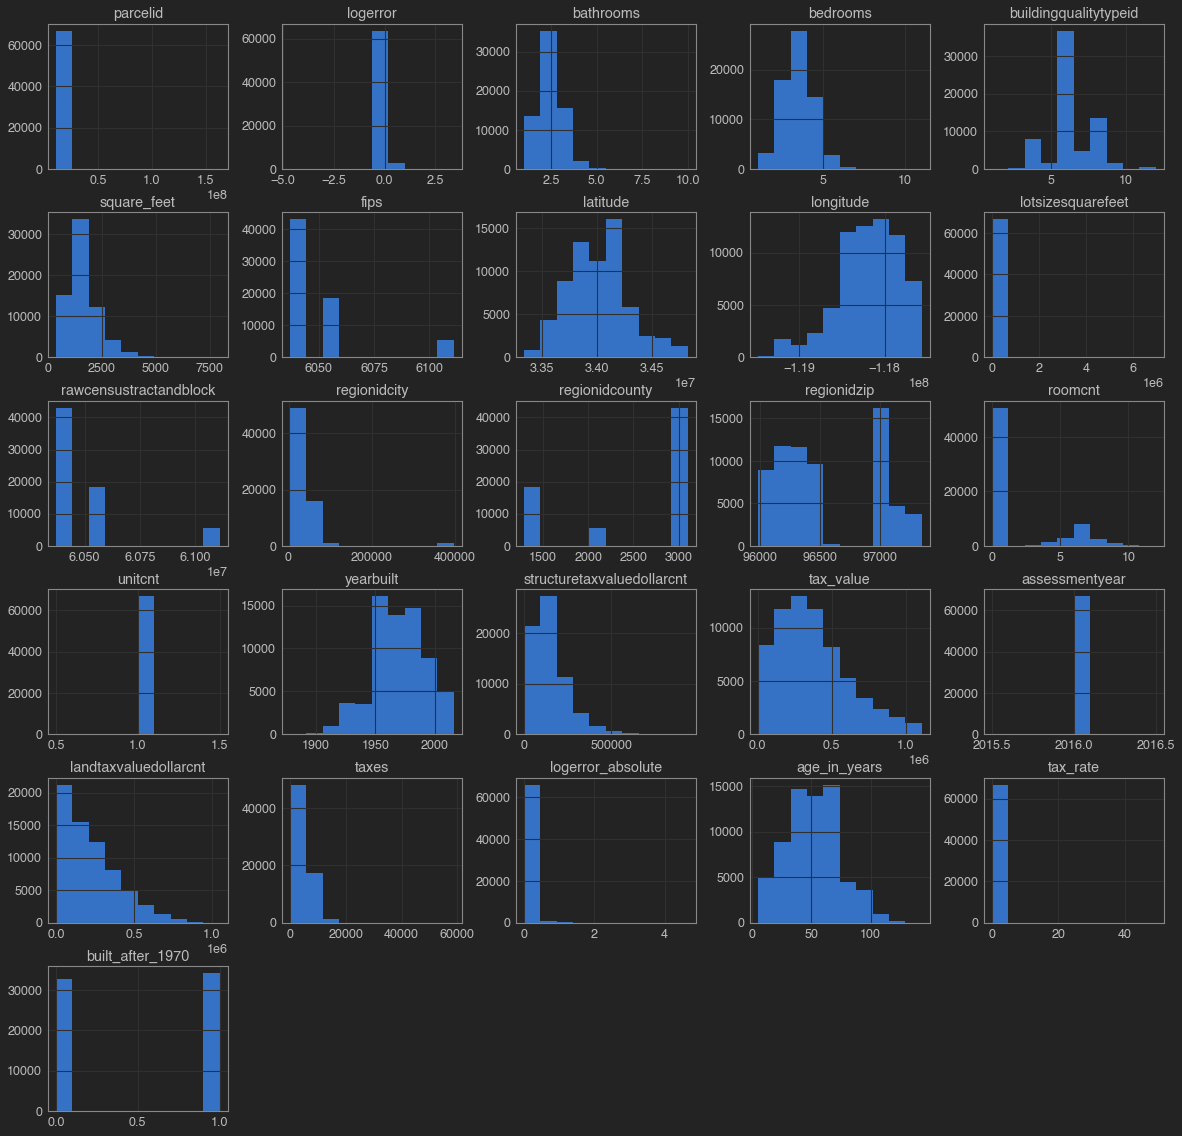

In [46]:
df.hist(figsize=[20,20])

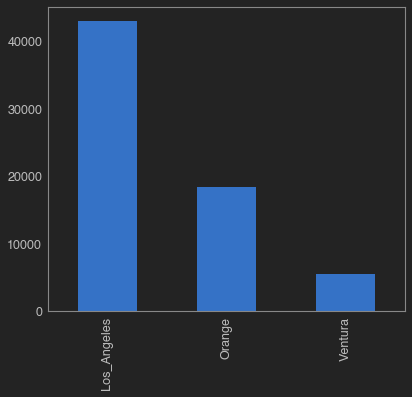

Los_Angeles    0.643124
Orange         0.274702
Ventura        0.082174
Name: county, dtype: float64

In [47]:
df.county.value_counts().plot.bar()
plt.show()
df.county.value_counts(normalize=True)

In [5]:
df.yearbuilt.describe()

count    66858.000000
mean      1969.113943
std         22.527280
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1986.000000
max       2016.000000
Name: yearbuilt, dtype: float64

In [40]:
df.age_in_years.describe()

count    66858.000000
mean        51.886057
std         22.527280
min          5.000000
25%         35.000000
50%         51.000000
75%         67.000000
max        143.000000
Name: age_in_years, dtype: float64

In [32]:
#new column for encoding houses built after 1970(median)
df['built_after_1970'] = df.yearbuilt.apply(lambda x: 1 if x >= 1970 else 0)

In [39]:
df.logerror_absolute.describe()

count    66858.000000
mean         0.064940
std          0.147503
min          0.000002
25%          0.013219
50%          0.030295
75%          0.063391
max          4.655420
Name: logerror_absolute, dtype: float64

## Univariate takeaways:
- median yearbuilt is 1970 and median home age is 51
- median absolute log_error is 0.03, max is ~4.7
- 64% of properties are in LA county

In [48]:
#splitting data
train, validate, test = split_zillow(df, stratify_by='county')

In [59]:
train.shape, validate.shape, test.shape

((37440, 31), (16046, 31), (13372, 31))

## 2. How does each variable compare to absolute logerror?

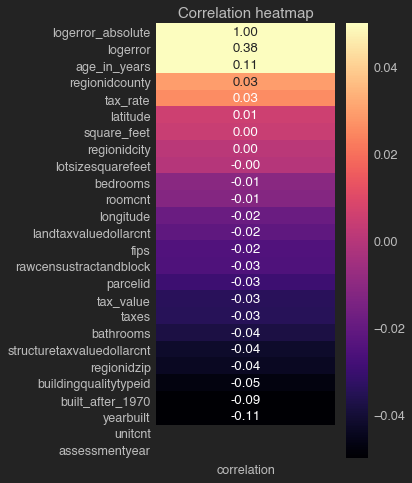

In [57]:
#correlation heatmap
corr = pd.DataFrame(train.corr()['logerror_absolute'].sort_values(ascending = False)).rename(columns = {'logerror_absolute':'correlation'})

plt.figure(figsize = (4,8))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, vmax = 0.05, cmap = 'magma')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

In [11]:
cat_vars = ['county', 'Bedrooms_cat', 'Bathrooms_cat', 'buildingqualitytypeid']

quant_vars = ['square_feet',                         
              'lotsizesquarefeet',              
              'tax_value',
              'taxes',              
              'age_in_years',
              'tax_rate',
              'bedrooms',
              'bathrooms',
              'logerror',
              'logerror_absolute'
               ]